<a href="https://colab.research.google.com/github/Piyumi22/XAI/blob/main/SHAP_example_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://viso.ai/deep-learning/explainable-ai/
2024 oct

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html


In [107]:
# Import necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

##upload data

In [108]:
# from google.colab import drive
# drive.mount('/content/drive')

In [109]:
# Step 1: Load the dataset from GitHub
github_url = "https://raw.githubusercontent.com/Piyumi22/XAI/main/diabetes.csv"
df = pd.read_csv(github_url)

# Display the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



When you set the random_state value, you are telling the program to use the same sequence of random numbers every time it runs. This makes the results consistent and reproducible.

In [110]:
df = df.dropna()  # Drop missing values

##pandas profiling

In [111]:
# !pip install pandas_profiling

In [112]:
# from pandas_profiling import ProfileReport
# # Generate the profiling report
# profile = ProfileReport(df, title="Diabetes Dataset Report", explorative=True)

# # Display the report in the notebook
# profile.to_notebook_iframe()

##XGBoost
Key Features of XGBoost Classifier:
Gradient Boosting Algorithm:





* Combines the predictions of multiple weak learners (usually decision trees) to create a strong learner.
Boosting is an iterative process where each new tree corrects the errors of the previous trees.
Optimized for Speed and Performance:

* Highly efficient implementation of gradient boosting.
Optimized for both computational efficiency and model accuracy.
Support for Regularization:

* Includes L1 and L2 regularization to prevent overfitting.
Handles Missing Data:

* Automatically learns the best way to handle missing values during training.
Parallel and Distributed Computing:

* Supports multi-threading and distributed computing for large-scale datasets.
Tree Pruning:

* Uses a "maximum delta step" approach to prune trees, making it robust and accurate.
Custom Loss Functions:

* Allows for custom loss functions in addition to common ones like logistic loss (for binary classification).
Supports Feature Importance Visualization:

Provides built-in tools to interpret feature importance.


###Key Parameters of XGBClassifier:
- n_estimators: Number of trees (default: 100).
- learning_rate: Step size for updating weights (default: 0.3).
- max_depth: Maximum depth of a tree (default: 6).
- objective: Learning task (e.g., binary:logistic for binary classification).
- random_state: Seed for reproducibility.


In [113]:
# Step 2: Define features (X) and target (y)
# X contains all columns except the last one (features).
# y contains only the last column, which is the target variable ('Outcome').
X = df.iloc[:, :-1]  # Select all rows and all columns except the last
y = df.iloc[:, -1]   # Select all rows and only the last column

# Step 3: Split the dataset into training and testing sets
# Using 75% of the data for training and 25% for testing.
# Setting a fixed random_state ensures reproducibility of the split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Step 4: Initialize the XGBoost classifier
# The `random_state` parameter ensures that the model's behavior is deterministic and reproducible.
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)

# Step 5: Train the XGBoost classifier on the training set
# The `.fit()` method trains the model using the training features (X_train) and the target (y_train).
model.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing set
# The `.score()` method computes the accuracy of the model on the testing set (X_test and y_test).
# Accuracy is the proportion of correctly classified samples.
score = model.score(X_test, y_test)

# Print the accuracy score
print(f"Model Accuracy: {score:.2f}")  # Display the model's performance as a percentage


Model Accuracy: 0.79



#SHAP


In [114]:
# Import the SHAP library
import shap  # SHAP (SHapley Additive exPlanations) is used for model interpretability

# Step 1: Initialize the SHAP TreeExplainer
# TreeExplainer is specifically designed for tree-based models like XGBoost, LightGBM, or Random Forest.
# It takes the trained model as input to compute SHAP values.
explainer = shap.TreeExplainer(model)

# Step 2: Compute SHAP values for the input data
# SHAP values explain the contribution of each feature to the model's predictions.
# Here, `X` is the input dataset (can be training or test data).
shap_values = explainer.shap_values(X)




##1. Summary Plot
The summary plot provides a global overview of feature importance and how they impact the model's predictions. It shows both the magnitude and direction of the SHAP values for all features across the dataset.


Interpretation:
The features are ranked by importance (top is most important).
The colors represent the feature value (red = high, blue = low).
The horizontal spread shows the range of SHAP values for each feature.


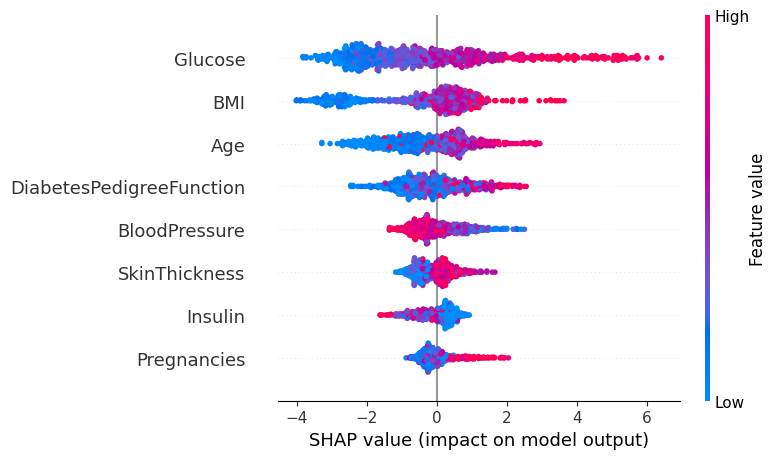

In [115]:
# Summary Plot
shap.summary_plot(shap_values, X, feature_names=X.columns)

##2. Dependence Plot
The dependence plot shows how a specific feature impacts the prediction, considering interactions with another feature.

Interpretation:
The x-axis shows the feature value.
The y-axis shows the SHAP value for the feature.
The color represents the value of an interacting feature (if applicable).

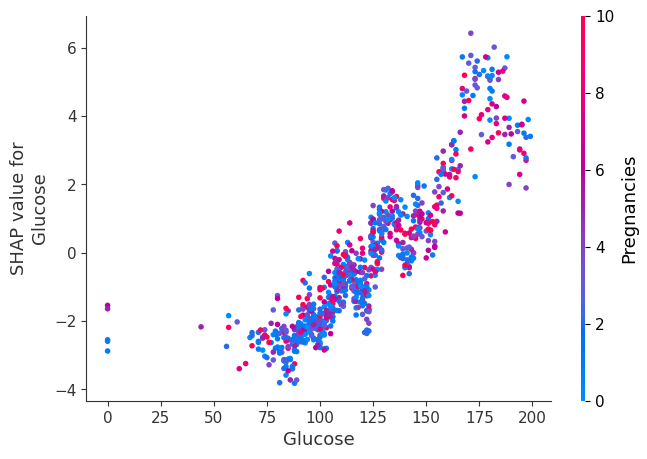

In [116]:
# Dependence Plot for 'Glucose'
shap.dependence_plot('Glucose', shap_values, X)


##3. Bar Plot
The bar plot shows the average absolute SHAP values for each feature, highlighting global feature importance.

python

Bar Plot
shap.summary_plot(shap_values, X, plot_type='bar')
Interpretation:
It provides a simpler alternative to the summary plot.
Focuses on the magnitude of the SHAP values (ignoring direction).


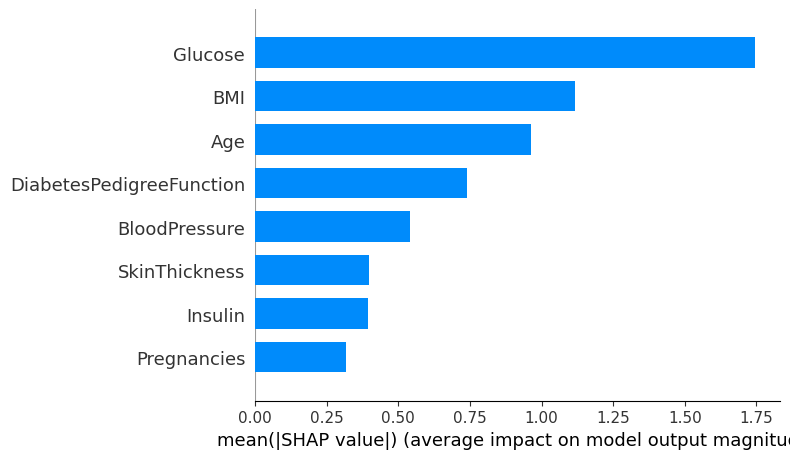

In [117]:
# Bar Plot
shap.summary_plot(shap_values, X, plot_type='bar')


##4. Force Plot (locally)
The force plot explains how each feature contributes to a single prediction. If interactive plots don't work in Colab, use SHAP’s HTML export feature.





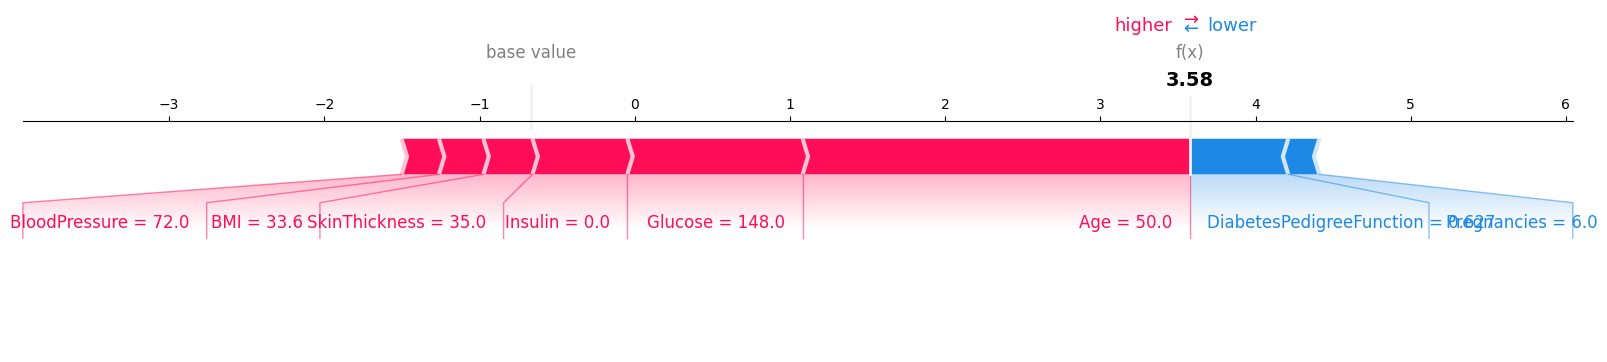

In [118]:
# Force Plot for a Single Prediction
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :],matplotlib=True) #first sample; 0th index

# Force plots are used to visualize the impact of each feature on a specific prediction.
# - `explainer.expected_value`: The base value or average prediction of the model.
# - `shap_values[0, :]`: The SHAP values for the first sample in the dataset.
# - `X_test.iloc[0, :]`: The feature values of the first sample from the test dataset.







##5. Waterfall Plot (locally)
The waterfall plot shows a breakdown of how each feature contributes to a single prediction.


Interpretation:
It visualizes the additive nature of SHAP values.
The base value adjusts step-by-step based on feature contributions to reach the final prediction.


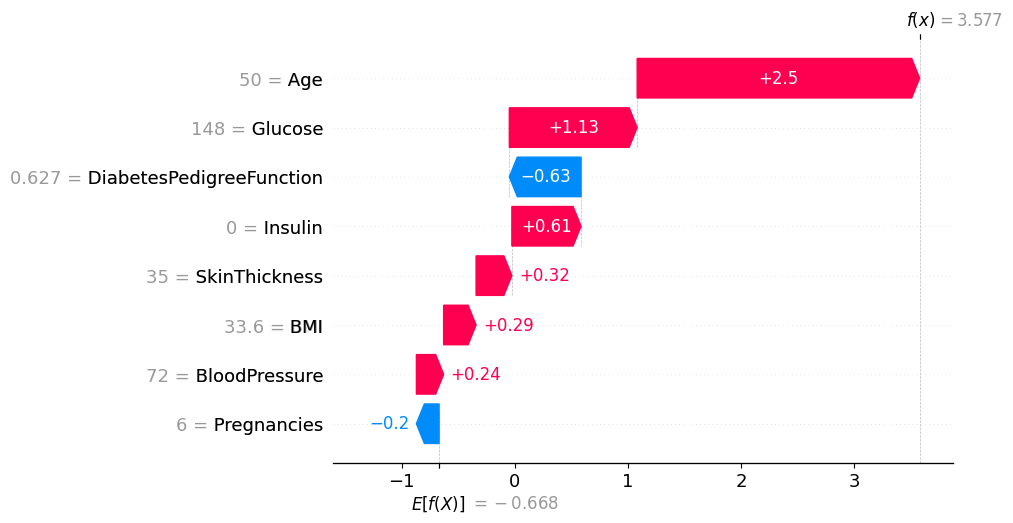

In [119]:
# Waterfall Plot
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X.iloc[0])) #0th index; sample 1



##6. Decision Plot
The decision plot shows how a model makes predictions by combining SHAP values across features. This plot is useful for understanding complex tree-based models.

The x-axis represents the model output.
Each feature contributes to moving the prediction from the base value to the final value.


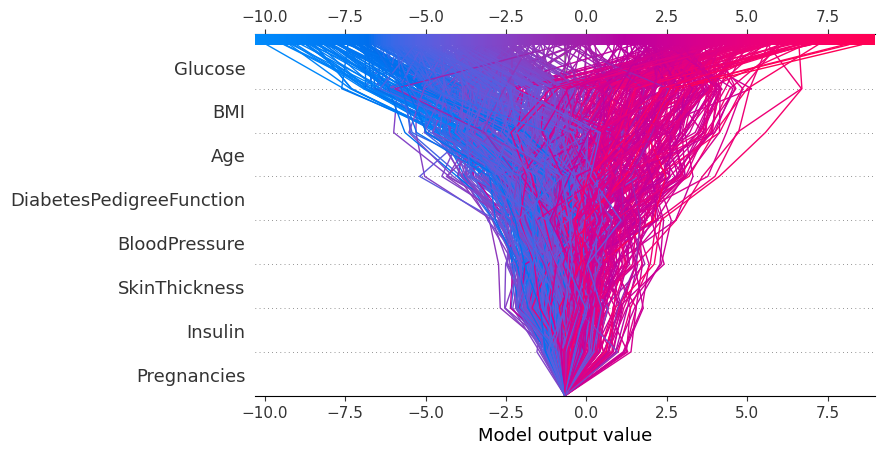

In [120]:
# Decision Plot
shap.decision_plot(explainer.expected_value, shap_values, X)


##7. Heatmap
The heatmap shows interactions between features and their combined impact on predictions.


Interpretation:
Helps identify strong feature interactions.
Color intensity represents the magnitude of the SHAP value..decision_plot(explainer.expected_value, shap_values, X)
Inter

What the SHAP Heatmap Represents:

- Rows (Samples):

Each row represents a sample (data point) from your dataset.
For example, if you have 100 test samples, the heatmap will have 100 rows.

- Columns (Features):

Each column represents a feature in the dataset.
For example, if you have 8 features (like Age, Glucose), the heatmap will have 8 columns.

- Colors (SHAP Values):

The color intensity indicates the magnitude of the SHAP value (the importance of the feature).
The color itself indicates whether the feature had a positive or negative impact on the prediction:
Red (positive): The feature increased the model's prediction for a specific class.
Blue (negative): The feature decreased the model's prediction for a specific class.

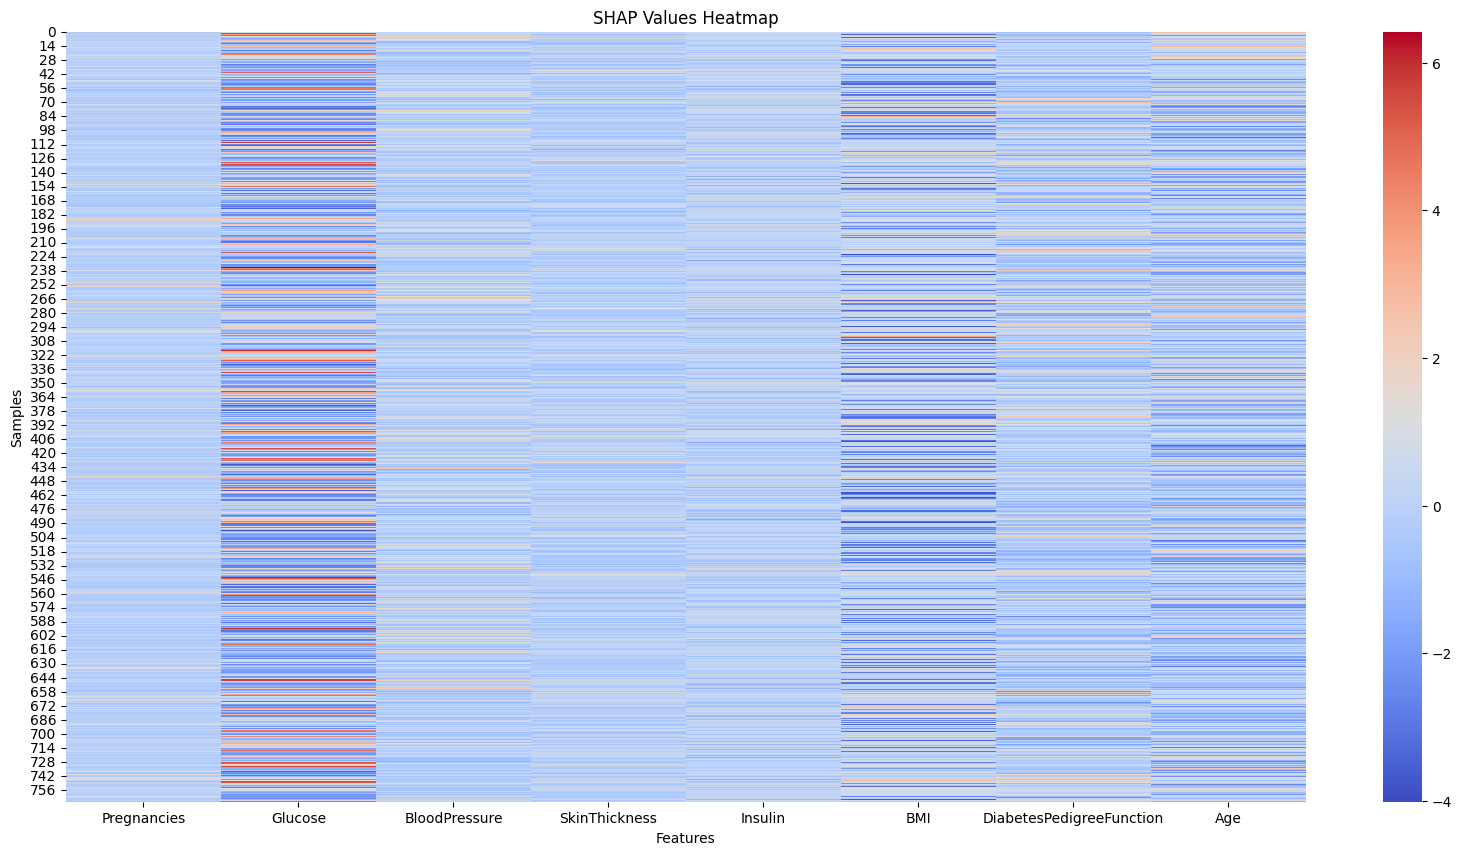

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert SHAP values to a DataFrame for better visualization
shap_df = pd.DataFrame(shap_values, columns=X.columns)

# Plot the heatmap using Seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(shap_df, cmap='coolwarm', cbar=True, xticklabels=X.columns)
plt.title("SHAP Values Heatmap")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()


Note:
 - The force plot shows how features push the prediction above or below the base value.
- Positive SHAP values push the prediction higher, while negative SHAP values push it lower.
 - `matplotlib=True` might be needed if running this code in Colab or Jupyter to render the plot.

##Partial Dependence Plots
It’s one of the simplest methods to understand how different features interact with each other and with the target. In this method, we change the value of one feature, while keeping others constant and observe the change in the dependent target.

This method allows us to identify regions where the change in feature values has a crucial impact on the prediction.

Method:if we have 100 samples and 10 different values for feature A, we make 100*10 dataset. first we tain model using initial dataset. and then we find the predictions from that trained model for this new dataset(100*10). we average the output predictions for each value of A(100 samples for each A value) and get an idea how predictions change with change of A.

The Python partial dependence plot toolbox or PDPbox is a package that provides functions to visualize these. In the same case of diabetes prediction, let us see how to plot partial dependence plots for a single feature:

In [122]:
 #pip install pdpbox

In [123]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [124]:
y_test.head()

,Outcome
661,1
122,0
113,0
14,1
529,0


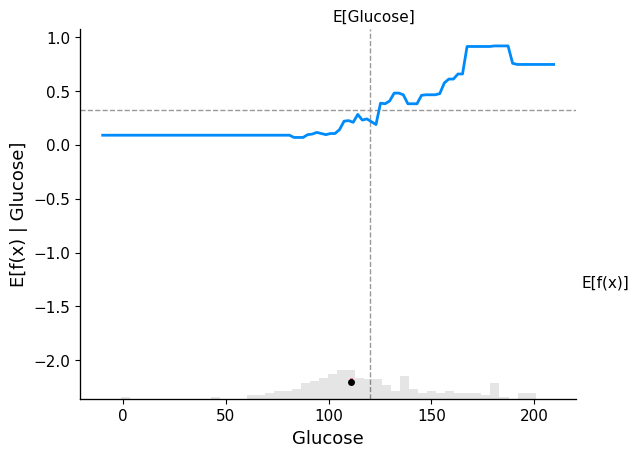

In [125]:
# train XGBoost model
import xgboost

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model, X_test)
shap_values_xgb = explainer_xgb(X_test)

# # make a standard partial dependence plot
sample_ind = 4

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "Glucose",
    model.predict,
    X_test,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)

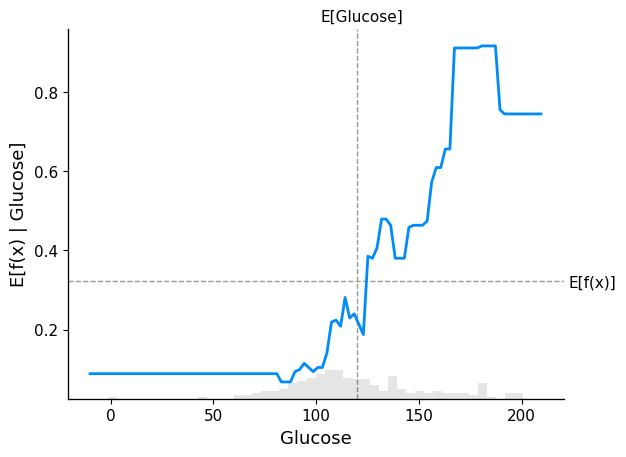

In [126]:
# Select a specific sample index to analyze
sample_ind = 4

# Make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "Glucose",
    model.predict,  # The model's prediction method
    X_test,  # The dataset used for partial dependence
    model_expected_value=True,  # Include the model's expected value in the plot
    feature_expected_value=True,  # Include the feature's expected value in the plot
    show=False,  # Do not display the plot immediately
    ice=False,  # Disable Individual Conditional Expectation (ICE) curves
    #shap_values=shap_values_xgb[sample_ind:sample_ind + 1, :]  # Use SHAP values for the selected sample
)

# Show the plot
plt.show()


####using plotly


In [131]:
import shap
import numpy as np
import plotly.graph_objects as go

# Step 3: Generate Partial Dependence Data for "Glucose"
feature_name = "Glucose"
feature_index = list(X_test.columns).index(feature_name)

# Generate a range of values for the feature
glucose_range = np.linspace(X_test[feature_name].min(), X_test[feature_name].max(), 100)

# Predict the model's output for varying values of "Glucose" while keeping other features constant
mean_feature_values = X_test.mean(axis=0)
pdp_data = []
for val in glucose_range:
    temp_input = mean_feature_values.copy()
    temp_input[feature_name] = val
    pdp_data.append(model.predict_proba([temp_input])[0][1])  # Predicted probability for class 1

# Step 4: Overlay a single SHAP explanation on the PDP
sample_ind = 4  # Index of the sample to overlay
sample_shap_values = shap_values_xgb.values[sample_ind, feature_index]
sample_glucose = X_test.iloc[sample_ind, feature_index]

# Step 5: Plot PDP with Plotly
fig = go.Figure()

# Add PDP line
fig.add_trace(
    go.Scatter(
        x=glucose_range,
        y=pdp_data,
        mode="lines",
        name="PDP for Glucose",
        line=dict(color="blue"),
    )
)

# Add SHAP value overlay
fig.add_trace(
    go.Scatter(
        x=[sample_glucose],
        y=[pdp_data[np.argmin(abs(glucose_range - sample_glucose))]],
        mode="markers",
        name="Sample SHAP Overlay",
        marker=dict(size=10, color="orange"),
    )
)

# Update layout
fig.update_layout(
    title="Partial Dependence Plot with SHAP Overlay for Glucose",
    xaxis_title="Glucose",
    yaxis_title="Predicted Probability",
    legend_title="Legend",
    template="plotly_white",
)

# Show the plot
fig.show()


In [128]:
# from sklearn.inspection import plot_partial_dependence
# import matplotlib.pyplot as plt

# # Plot PDP for the 'Glucose' feature
# plot_partial_dependence(model, X_test, ['Glucose'])
# plt.show()


###scatter plot(Globally)

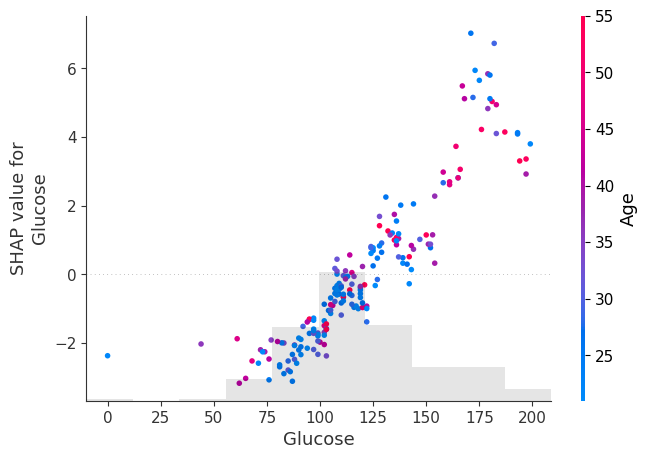

In [132]:
shap.plots.scatter(shap_values_xgb[:,"Glucose"], color=shap_values_xgb)

##Permutation Feature Importance
It is a simple and intuitive method to find the feature importance and ranking for non-linear black box models. In this method, we randomly shuffle or change the value of a single feature, while the remaining features are constant.

Then, we check the model performance using relevant metrics such as accuracy, RMSE, etc., done iteratively for all the features. The larger the drop in performance after shuffling a feature, the more significant it is.
- If shuffling a feature has a very low impact, we can even **drop the variable to reduce noise**

 can compute the permutation feature importance in a few simple steps using the Tree Interpreter or ELI5 library.

In [ ]:
# Import the package and module

import eli5

from eli5.sklearn import PermutationImportance

# Pass the model and test dataset

my_set = PermutationImportance(model, random_state=34).fit(X_test,y_test)

eli5.show_weights(my_set, feature_names = X_test.columns.tolist())

##LIME
Local Interpretable Model-Agnostic Explanations (LIME) is widely used to explain black box models at a local level. When we have complex models like CNNs, LIME uses a simple, explainable model to understand its prediction.

To make it even easier to understand, let’s see how LIME works in a step-wise manner:

Define your local point: Choose a specific prediction you want to explain (e.g., why an image was classified as a cat by a CNN).

Generate variations: Create slight variations of the input data (e.g., slightly modified pixels in the image).

Predict with the original model: Pass the input to CNN and get the predicted output class for each variation.

Build an explainer model: Train a simple linear model to explain the relationship between the variations and the model’s predictions.

Interpret the explainer: Now, you can interpret the explainer model with any method like feature importance, PDP, etc. to understand which features played a crucial role in the original prediction.
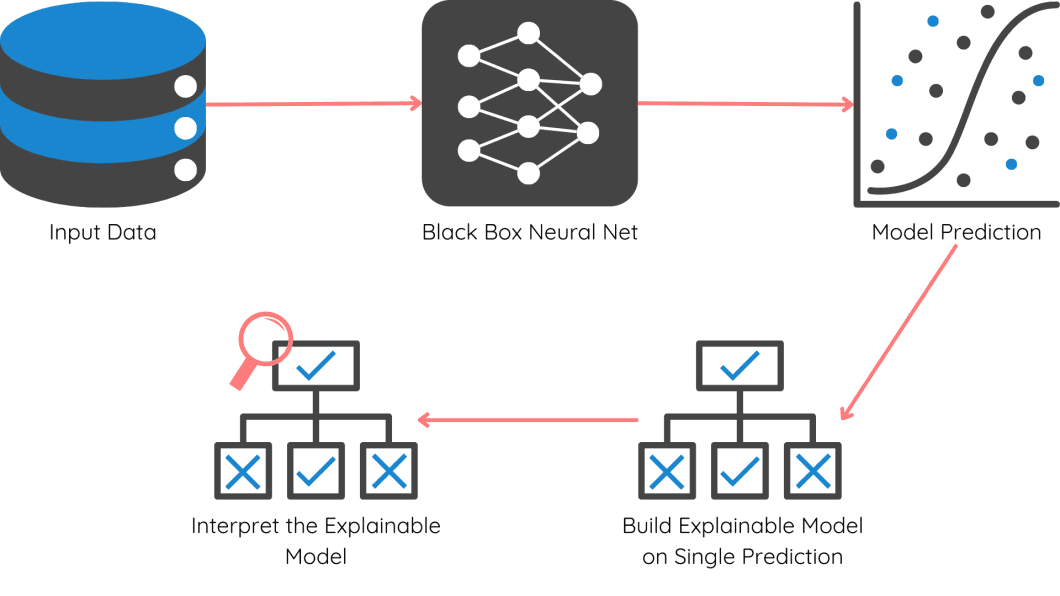